Surbhi Kabra

## HW4 Exploratory Data Analysis

It's time to tie together everything we've learned so far into a more formal exploratory data anlysis. For this homework assignment, we'll use the familiar adult income dataset again. 

Each step should be supported with statistical and visaul analysis, as we walked through in each lab. 

In [308]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

df = pd.read_csv("../Datasets/adult.data", 
                 header=None,
                names=["age", "workclass", "fnlwgt", "education", "education_num", \
             "marital-status", "occupation", "relationship", "race", "sex", \
             "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"])
df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Step 1: Describe the dataset
Let us know where this dataset came from, what the columns contain, the dimensions, and any other important information about this dataset. 

Income >50K, <=50K. 
age: continuous. 
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
fnlwgt: continuous. 
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
education-num: continuous. 
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
sex: Female, Male. 
capital-gain: continuous. 
capital-loss: continuous. 
hours-per-week: continuous. 
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Step 2: Data Munging
- Clean up the column names as needed
- Deal with any missing values
- Encode categorical columns
- Bin the income column

Column names of the dataset look good. No need to clean them.

In [275]:
#Dealing with missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [309]:
df.workclass.value_counts()
df.workclass = df.workclass.str.replace('?','Private')

In [310]:
df.workclass.value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [311]:
df = pd.get_dummies(df, columns=['race'])
df = pd.get_dummies(df, columns=['workclass'])
df = pd.get_dummies(df, columns=['education'])
df = pd.get_dummies(df, columns=['sex'])
df = pd.get_dummies(df, columns=['occupation'])
df = pd.get_dummies(df, columns=['relationship'])
df = pd.get_dummies(df, columns=['marital-status'])
df = pd.get_dummies(df, columns=['native_country'])
df = pd.get_dummies(df, columns=['income'])
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [312]:
df.dtypes

age                                           int64
fnlwgt                                        int64
education_num                                 int64
capital_gain                                  int64
capital_loss                                  int64
hours_per_week                                int64
race_ Amer-Indian-Eskimo                      uint8
race_ Asian-Pac-Islander                      uint8
race_ Black                                   uint8
race_ Other                                   uint8
race_ White                                   uint8
workclass_ Federal-gov                        uint8
workclass_ Local-gov                          uint8
workclass_ Never-worked                       uint8
workclass_ Private                            uint8
workclass_ Self-emp-inc                       uint8
workclass_ Self-emp-not-inc                   uint8
workclass_ State-gov                          uint8
workclass_ Without-pay                        uint8
education_ 1

## Step 3: Scale as Needed
- Scale/standardize columns as needed
- Tell us why you did/did not choose a particular method for your dataset
- Support your decision with visualizations

In [313]:
df_num = df.select_dtypes(include=['int64'])
df_num.isnull().sum()
final_df = df_num.join(df[['income_ <=50K','income_ >50K']])

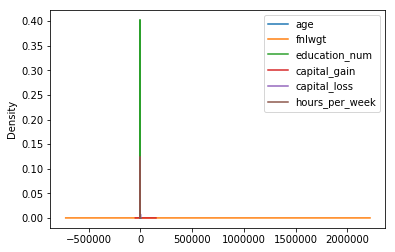

In [314]:
%matplotlib inline
df_num.plot(kind='density')

Feature Scaling is required in this case as we can see that the datapoints in this dataset are on different scales

# Standard Scaling

In [315]:
from sklearn import preprocessing 

# Create a minimum and maximum processor object
standard_scaler = preprocessing.StandardScaler()

df_std = pd.DataFrame(standard_scaler.fit_transform(df_num))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [316]:
df_std.head()

,0,1,2,3,4,5
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [317]:
df_std.columns = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
df_std.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [318]:
# Create a minimum and maximum processor object
minmax_scaler = preprocessing.MinMaxScaler()

df_mm = pd.DataFrame(minmax_scaler.fit_transform(df_num))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Min-MAx Scaling

In [319]:
df_mm.columns = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
df_mm.mean()

age               0.295639
fnlwgt            0.120545
education_num     0.605379
capital_gain      0.010777
capital_loss      0.020042
hours_per_week    0.402423
dtype: float64

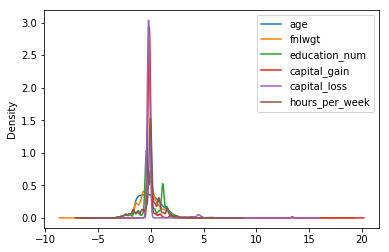

In [320]:
%matplotlib inline
df_std.plot(kind='density')

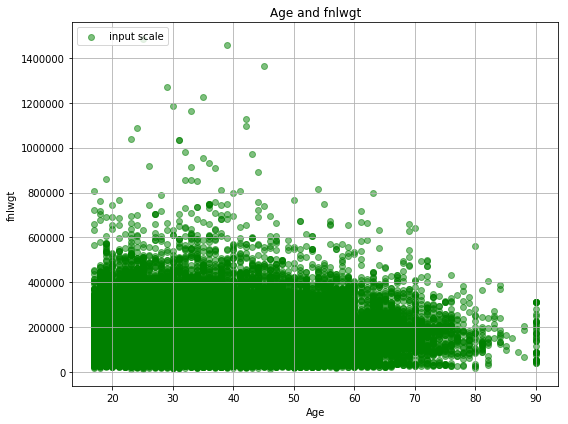

In [167]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['age'], df['fnlwgt'],
           color='green', label='input scale', alpha=0.5)
    plt.title('Age and fnlwgt')
    plt.xlabel('Age')
    plt.ylabel('fnlwgt')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()
    
plot()
plt.show()

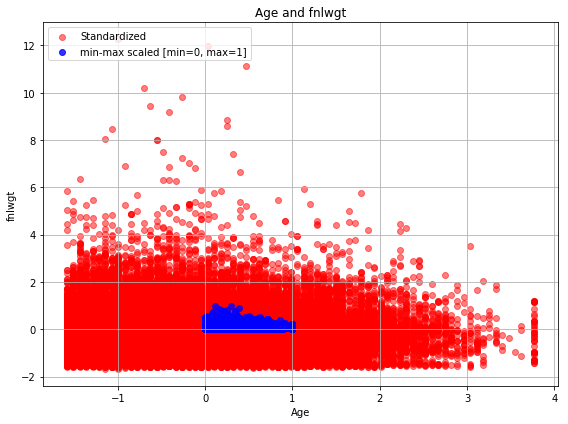

In [47]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df_std['age'], df_std['fnlwgt'], color='red',
            label='Standardized', alpha=0.5)

    plt.scatter(df_mm['age'], df_mm['fnlwgt'],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.8)

    plt.title('Age and fnlwgt')
    plt.xlabel('Age')
    plt.ylabel('fnlwgt')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

# Reason to choose Standard instead of Min-Max

Standard Scale should be preferred as compared to Min-Max scale because Min-Max scale has lower standard deviations which suppresses the effect of outliers.

## Step 4: Examine Correlation
- Plot the correlation matrix
- Pull out two variables that show the highest correlation with the income column and calculate their Person Correlatoin Coefficient

In [286]:
df['age']=df_std['age']
df['fnlwgt']=df_std['fnlwgt']
df['education_num']=df_std['education_num']
df['capital_gain']=df_std['capital_gain']
df['capital_loss']=df_std['capital_loss']
df['hours_per_week']=df_std['hours_per_week']

In [287]:
df_std.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


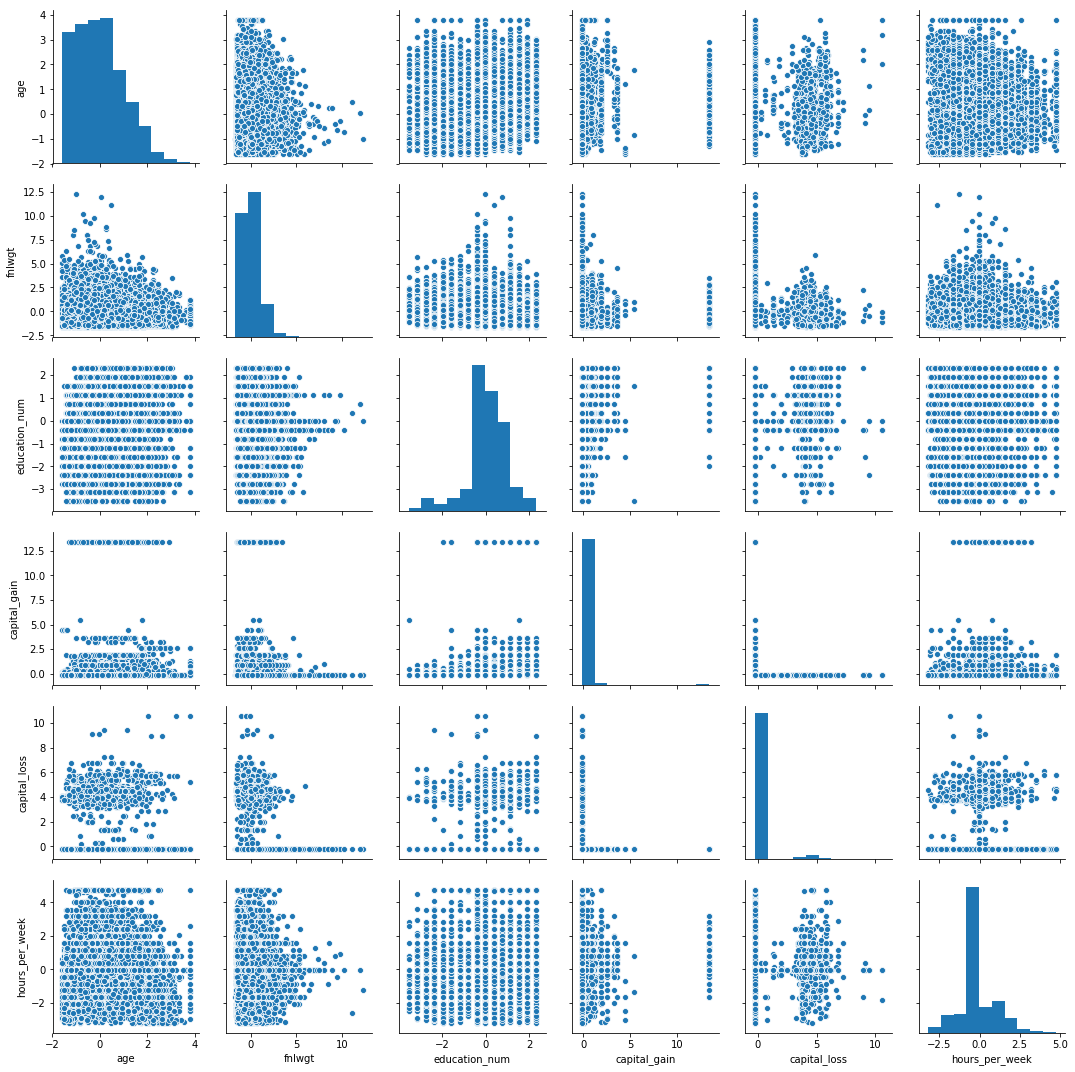

In [197]:
sns.pairplot(df_std)

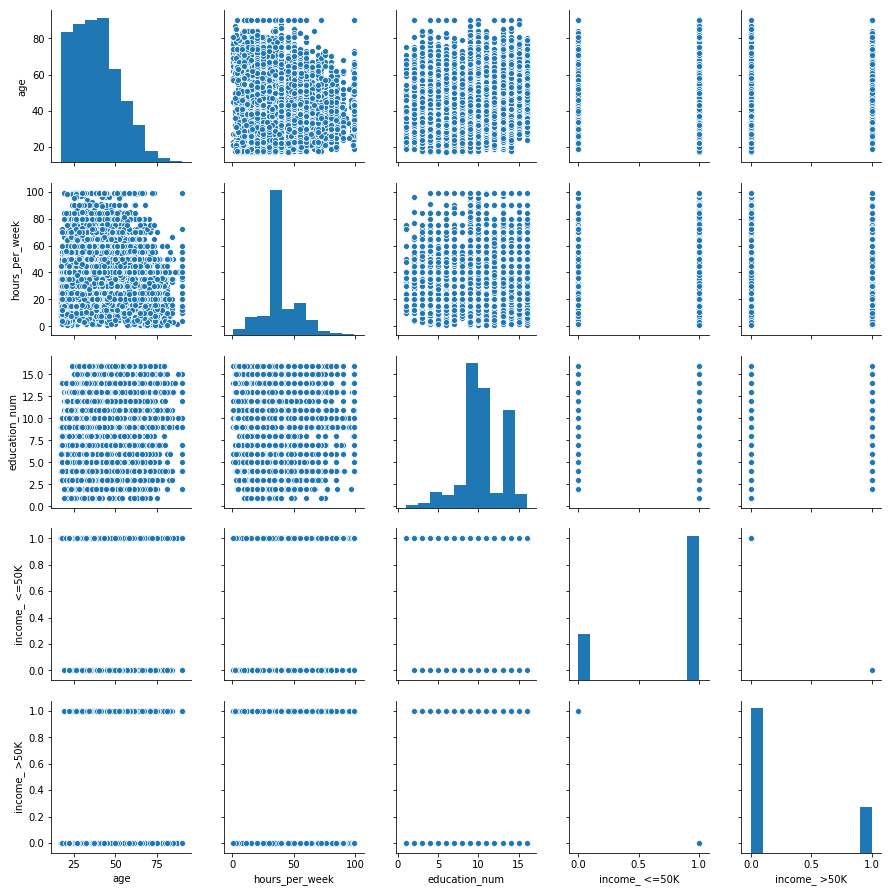

In [229]:
sns.pairplot(df[['age','hours_per_week','education_num','income_ <=50K','income_ >50K']])

The income column is not normally distributed whereas column like education_num and hours_per_week are fairly normal.
This states that there isn't any correlation.

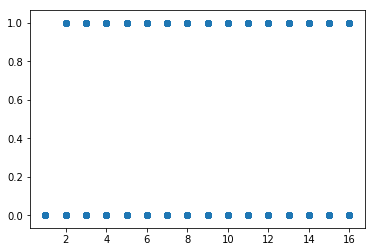

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.education_num, df['income_ >50K'])

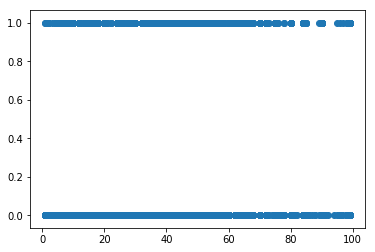

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.hours_per_week, df['income_ >50K'])

This clearly shows no correlation between income and other columns

In [231]:
import seaborn as sns
corr_df = df[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','income_ <=50K','income_ >50K']].corr()
corr_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_ <=50K,income_ >50K
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,-0.234037,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,0.009463,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,-0.335154,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,-0.223329,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,-0.150526,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,-0.229689,0.229689
income_ <=50K,-0.234037,0.009463,-0.335154,-0.223329,-0.150526,-0.229689,1.000000,-1.000000
income_ >50K,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,-1.000000,1.000000


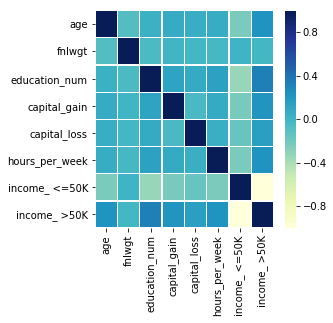

In [232]:
f, ax = plt.subplots(figsize =(4, 4)) 
sns.heatmap(corr_df, ax = ax, cmap ="YlGnBu", linewidths = 0.3) 

In [236]:
df[['hours_per_week','education_num','income_ >50K','income_ <=50K']].corr()

,hours_per_week,education_num,income_ >50K,income_ <=50K
hours_per_week,1.000000,0.148123,0.229689,-0.229689
education_num,0.148123,1.000000,0.335154,-0.335154
income_ >50K,0.229689,0.335154,1.000000,-1.000000
income_ <=50K,-0.229689,-0.335154,-1.000000,1.000000


## Step 5: Test your predictors for normality
- For each of your top 2 columns, test the normality of the distribution
- Visualize and report test statistics

The top two columns in my analysis are education_num and hours_per_week(even though they are close to zero)

# QQ plots

In [246]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(df.education_num)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 817.1641448645273, Pvalue= 3.5897196971962224e-178
Sample does not look Gaussian (reject H0)


In [247]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(df.hours_per_week)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 2508.9184404706616, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


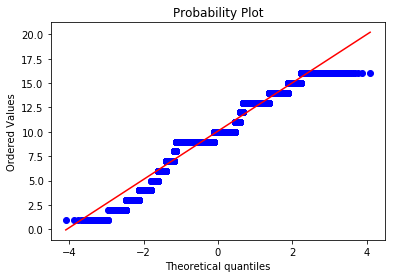

In [240]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df.education_num, dist="norm", plot=plt)
plt.show()

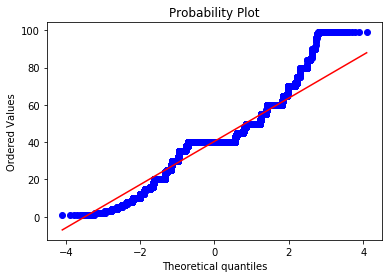

In [241]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df.hours_per_week, dist="norm", plot=plt)
plt.show()

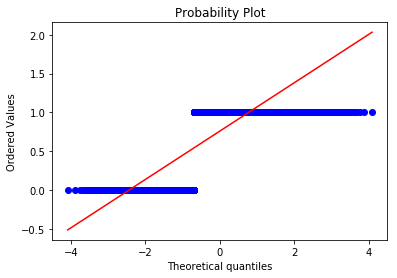

In [242]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df['income_ <=50K'], dist="norm", plot=plt)
plt.show()

## Step 6: Test for Outliers
- Find and report the number of outliers found
- Visualize and describe any patterns or lack therof
- Remove and re-examine the effect on the normality of your data

In [321]:
from scipy.stats import zscore
df["education_num_Zcol"] = zscore(df.education_num)

In [322]:
from scipy.stats import zscore
df["hours_per_week_Zcol"] = zscore(df.hours_per_week)

In [323]:
len(df[abs(df.education_num_Zcol) > 2.5])# count the number of outliers here

552

In [324]:
len(df[abs(df.hours_per_week_Zcol) > 2.5])# count the number of outliers here

956

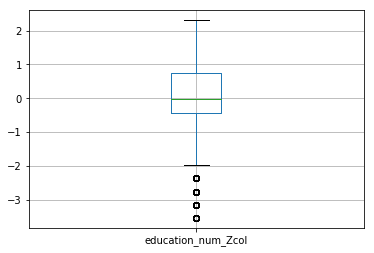

In [325]:
df[["education_num_Zcol"]].boxplot()

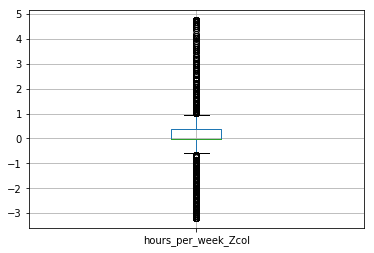

In [326]:
df[["hours_per_week_Zcol"]].boxplot()

In [304]:
df.hours_per_week.describe()

count    552.000000
mean      -0.157354
std        0.930002
min       -3.032051
25%       -0.440378
50%       -0.035429
75%       -0.035429
max        4.499997
Name: hours_per_week, dtype: float64

In [327]:
df = df[abs(df.education_num_Zcol) > 2.5]
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,...,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K,education_num_Zcol,hours_per_week_Zcol
56,46,216666,3,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,-2.752257,-0.035429
160,68,38317,2,0,0,20,0,0,0,0,...,0,0,0,1,0,0,1,0,-3.140957,-1.655225
195,23,197387,3,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,-2.752257,-0.035429
221,64,187656,2,0,0,40,0,0,0,0,...,0,0,0,1,0,0,1,0,-3.140957,-0.035429
224,53,140359,1,0,0,35,0,0,0,0,...,0,0,0,1,0,0,1,0,-3.529656,-0.440378


In [329]:
df = df[abs(df.hours_per_week_Zcol) > 2.5]
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,...,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K,education_num_Zcol,hours_per_week_Zcol
2667,38,407068,3,0,0,75,0,0,0,0,...,0,0,0,0,0,0,1,0,-2.752257,2.799212
5877,37,323155,2,0,0,85,0,0,0,0,...,0,0,0,0,0,0,1,0,-3.140957,3.609110
8069,57,300104,3,7298,0,84,0,0,0,0,...,0,0,0,1,0,0,0,1,-2.752257,3.528120
8282,43,143582,3,0,2129,72,0,1,0,0,...,0,0,0,0,0,0,1,0,-2.752257,2.556243
8310,69,113035,2,0,0,4,0,0,1,0,...,0,0,0,1,0,0,1,0,-3.140957,-2.951061


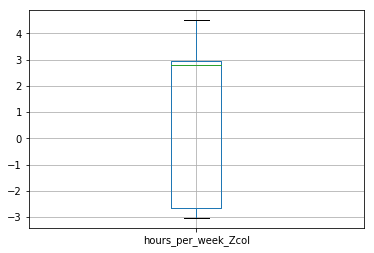

In [330]:
df[["hours_per_week_Zcol"]].boxplot()

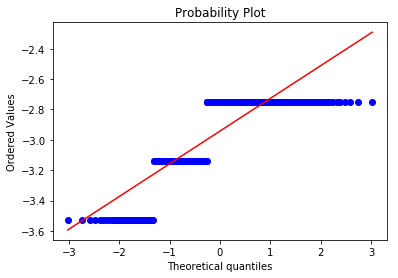

In [300]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df.education_num, dist="norm", plot=plt)
plt.show()

Even after removing the outliers, the data is not normal.

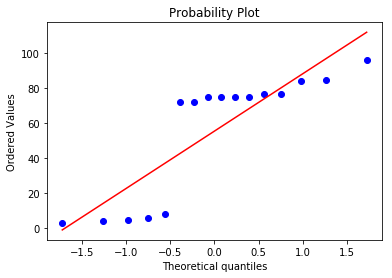

In [332]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(df.hours_per_week, dist="norm", plot=plt)
plt.show()

Even after removing the outliers, the data is not normal.

## Step 7: For two points, let us know what questions you have

The above data set does not qualify to be normal and after removing outliers there is no difference in the normality 
So what should I conclude from this kind of data set ? Do we expect to improve normality after removing outliers ?